In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
!pip install -q kaggle

In [1]:
# from google.colab import files
# files.upload()

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-29 17:04:40          85403  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          14816  
promptcloud/jobs-on-naukricom                               Jobs On Naukri.com                                    3MB  2020-06-15 10:51:07            954  
shubh0799/churn-modelling                                   Churn Modelling                                     262KB  2020-06-20 17:33:28            730  
mikahama/the-best-sarcasm-annotated-dataset-in-spanish      The 

In [9]:
!kaggle datasets download -d jessicali9530/stanford-dogs-dataset

 99% 741M/750M [00:12<00:00, 79.3MB/s]
100% 750M/750M [00:13<00:00, 60.5MB/s]


In [10]:
!unzip stanford-dogs-dataset.zip -d stanford-dogs-dataset/

Streaming output truncated to the last 5000 lines.
  inflating: stanford-dogs-dataset/images/Images/n02108089-boxer/n02108089_117.jpg  
  inflating: stanford-dogs-dataset/images/Images/n02108089-boxer/n02108089_11807.jpg  
  inflating: stanford-dogs-dataset/images/Images/n02108089-boxer/n02108089_11875.jpg  
  inflating: stanford-dogs-dataset/images/Images/n02108089-boxer/n02108089_122.jpg  
  inflating: stanford-dogs-dataset/images/Images/n02108089-boxer/n02108089_12232.jpg  
  inflating: stanford-dogs-dataset/images/Images/n02108089-boxer/n02108089_125.jpg  
  inflating: stanford-dogs-dataset/images/Images/n02108089-boxer/n02108089_12738.jpg  
  inflating: stanford-dogs-dataset/images/Images/n02108089-boxer/n02108089_12739.jpg  
  inflating: stanford-dogs-dataset/images/Images/n02108089-boxer/n02108089_12827.jpg  
  inflating: stanford-dogs-dataset/images/Images/n02108089-boxer/n02108089_13340.jpg  
  inflating: stanford-dogs-dataset/images/Images/n02108089-boxer/n02108089_13526.jpg 

In [11]:
path = Path("./stanford-dogs-dataset")

In [12]:
path.ls()

[PosixPath('stanford-dogs-dataset/annotations'),
 PosixPath('stanford-dogs-dataset/images')]

In [13]:
path_images = path/'images/Images'

In [14]:
path_images.ls()

[PosixPath('stanford-dogs-dataset/images/Images/n02110627-affenpinscher'),
 PosixPath('stanford-dogs-dataset/images/Images/n02098286-West_Highland_white_terrier'),
 PosixPath('stanford-dogs-dataset/images/Images/n02086646-Blenheim_spaniel'),
 PosixPath('stanford-dogs-dataset/images/Images/n02100877-Irish_setter'),
 PosixPath('stanford-dogs-dataset/images/Images/n02107142-Doberman'),
 PosixPath('stanford-dogs-dataset/images/Images/n02113978-Mexican_hairless'),
 PosixPath('stanford-dogs-dataset/images/Images/n02102480-Sussex_spaniel'),
 PosixPath('stanford-dogs-dataset/images/Images/n02095889-Sealyham_terrier'),
 PosixPath('stanford-dogs-dataset/images/Images/n02101388-Brittany_spaniel'),
 PosixPath('stanford-dogs-dataset/images/Images/n02106030-collie'),
 PosixPath('stanford-dogs-dataset/images/Images/n02093859-Kerry_blue_terrier'),
 PosixPath('stanford-dogs-dataset/images/Images/n02096177-cairn'),
 PosixPath('stanford-dogs-dataset/images/Images/n02087394-Rhodesian_ridgeback'),
 PosixPa

In [15]:
data = ImageDataBunch.from_folder(path,train=",",valid_pct=0.2,ds_tfms = get_transforms(),size = 227, num_workers = 0).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [16]:
len(data.classes)

120

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


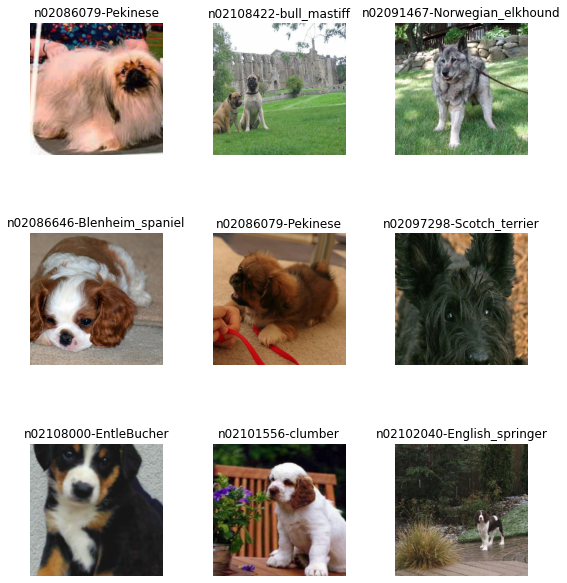

In [17]:
data.show_batch(rows = 3, figsize = (8,9))

In [18]:
learn = create_cnn(data, models.resnet34, metrics = error_rate )

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(4)

Streaming output truncated to the last 5000 lines.
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old beha

In [ ]:
learnṭ

Learner(data=ImageDataBunch;

Train: LabelList (16464 items)
x: ImageList
Image (3, 227, 227),Image (3, 227, 227),Image (3, 227, 227),Image (3, 227, 227),Image (3, 227, 227)
y: CategoryList
n02110627-affenpinscher,n02110627-affenpinscher,n02110627-affenpinscher,n02110627-affenpinscher,n02110627-affenpinscher
Path: stanford-dogs-dataset;

Valid: LabelList (4116 items)
x: ImageList
Image (3, 227, 227),Image (3, 227, 227),Image (3, 227, 227),Image (3, 227, 227),Image (3, 227, 227)
y: CategoryList
n02112137-chow,n02088364-beagle,n02115641-dingo,n02096177-cairn,n02105855-Shetland_sheepdog
Path: stanford-dogs-dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(

In [ ]:
learn.save('/gdrive/My Drive/dog_model/stage-1')

In [2]:
# from google.colab import drive
# drive.mount('/gdrive')

In [ ]:
learn.unfreeze()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


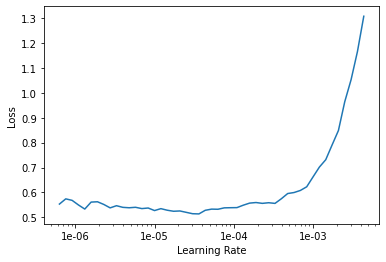

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-05,1e-04))

Streaming output truncated to the last 5000 lines.
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old beha

In [ ]:
learn.save('/gdrive/My Drive/dog_model/final_model')

In [ ]:
learn.load('/content/drive/My Drive/dog_model/final_model')

Learner(data=ImageDataBunch;

Train: LabelList (16464 items)
x: ImageList
Image (3, 227, 227),Image (3, 227, 227),Image (3, 227, 227),Image (3, 227, 227),Image (3, 227, 227)
y: CategoryList
n02110627-affenpinscher,n02110627-affenpinscher,n02110627-affenpinscher,n02110627-affenpinscher,n02110627-affenpinscher
Path: stanford-dogs-dataset;

Valid: LabelList (4116 items)
x: ImageList
Image (3, 227, 227),Image (3, 227, 227),Image (3, 227, 227),Image (3, 227, 227),Image (3, 227, 227)
y: CategoryList
n02102318-cocker_spaniel,n02098413-Lhasa,n02095314-wire-haired_fox_terrier,n02112137-chow,n02090721-Irish_wolfhound
Path: stanford-dogs-dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential

In [ ]:
intrept = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [ ]:
intrept.plot_confusion_matrix(figsize = (100,100), dpi = 100)

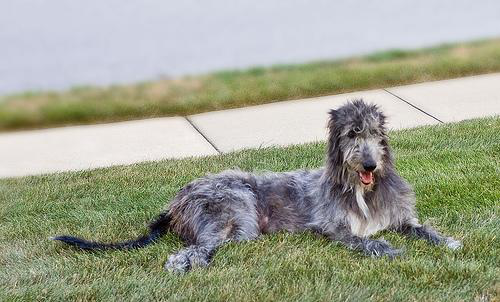

In [20]:
img = open_image('/content/stanford-dogs-dataset/images/Images/n02090721-Irish_wolfhound/n02090721_1002.jpg')
img

In [19]:
classes = data.classes
data2 = ImageDataBunch.single_from_classes(path, classes, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2 , models.resnet34)
learn.load('/content/drive/My Drive/dog_model/final_model')

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: stanford-dogs-dataset;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: stanford-dogs-dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [ ]:
# data.classes

In [21]:
pred_class,pred_idx,op=learn.predict(img)

In [22]:
data.classes[19]

'n02090721-Irish_wolfhound'

In [23]:
data.classes[pred_idx.item()][10:]

'Irish_wolfhound'

In [37]:
learn.export("/content/drive/My Drive/dog_model/final_model.pkl")

In [26]:
learn.export()

In [32]:
nl=load_learner('/content/stanford-dogs-dataset/')

In [ ]:
load_learner()

In [33]:
nl.predict(img)

(Category tensor(19),
 tensor(19),
 tensor([3.5060e-11, 1.7941e-09, 1.1568e-09, 7.3600e-10, 6.0781e-08, 6.9360e-11,
         3.0588e-10, 1.1970e-10, 2.2183e-08, 9.5239e-07, 1.4654e-08, 2.6194e-11,
         3.7427e-09, 1.7342e-07, 3.6208e-09, 1.2595e-09, 1.4613e-10, 1.1910e-10,
         3.5327e-06, 9.1023e-01, 3.5730e-09, 3.9507e-07, 1.5645e-08, 9.6162e-08,
         1.0622e-04, 1.5910e-08, 8.9403e-02, 2.0829e-08, 5.6642e-10, 5.0159e-09,
         4.3383e-08, 5.0779e-07, 2.6499e-08, 4.7825e-07, 9.7910e-08, 1.8505e-08,
         3.9401e-09, 1.1696e-08, 3.7475e-07, 7.3622e-09, 6.7262e-09, 6.4000e-06,
         6.2421e-09, 1.7143e-04, 2.1718e-09, 1.8233e-08, 7.8159e-06, 1.0709e-05,
         3.1662e-08, 9.3886e-07, 1.7611e-09, 1.8469e-07, 9.2726e-09, 3.5982e-08,
         4.3467e-07, 8.1788e-09, 7.4232e-10, 7.8275e-09, 1.8112e-08, 1.9268e-08,
         1.8379e-09, 7.0766e-07, 4.4739e-09, 1.6416e-07, 4.1632e-09, 3.8808e-08,
         1.9951e-08, 2.1707e-09, 7.7563e-09, 5.9944e-10, 3.7433e-08, 7.662

In [47]:
class_dict = {}
for i,j in enumerate(data.classes):
    # print(i,j[10:])
    class_dict[i] = j[10:]

In [50]:
import json

In [52]:
class_json=json.dumps(class_dict)

In [66]:
with open('classes.json','w') as outfile:
    json.dump(class_json,outfile) 